In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import Calendar dataset
df_cal=pd.read_csv('calendar.csv', thousands=',')
pd.set_option("display.max_columns", None)
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
#Check if any empty records for the price
df_cal['price'].isnull().value_counts()

False    934542
True     459028
Name: price, dtype: int64

In [5]:
#Convert price to numerical value
df_cal["price"] = df_cal["price"].str.replace('[$,,,]',"").astype(float)

<ipython-input-5-61781eef3286>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cal["price"] = df_cal["price"].str.replace('[$,,,]',"").astype(float)


In [6]:
#Impute the missing data of price columns with mean
df_cal['price'].fillna((df_cal['price'].mean()), inplace=True)

In [7]:
#Create new feature represent the month of a year
df_cal['month'] = pd.DatetimeIndex(df_cal['date']).month
df_cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.000000,1
1,241032,2016-01-05,t,85.000000,1
2,241032,2016-01-06,f,137.944859,1
3,241032,2016-01-07,f,137.944859,1
4,241032,2016-01-08,f,137.944859,1


In [ ]:
#Plot the busiest seattle time of the year
busytime=df_cal.groupby(['month']).price.mean()
busytime.plot(kind = 'bar', title="BusyTime")

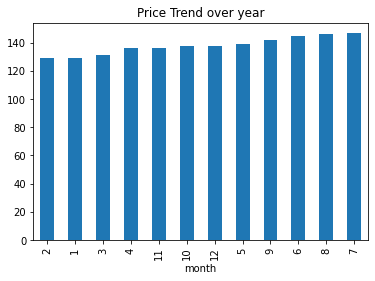

In [12]:
#Plot the price range accross the year
busytime_price=df_cal.groupby(['month']).mean()['price'].sort_values().dropna()
busytime_price.plot(kind="bar");
plt.title("Price Trend over year");